# US Students Dataset – Data Cleaning, Feature Extraction & ML Pipeline

**EduConnect Project** – Machine learning pipeline for study partner matching and student clustering.

This notebook covers:
1. **Data Loading & Exploration**
2. **Data Cleaning** – missing values, inconsistencies, format normalization
3. **Feature Extraction** – derived features from text columns
4. **Data Preprocessing** – encoding, scaling, train/test split
5. **Machine Learning Pipeline** – clustering and classification models
6. **Visualizations** – distributions, correlation heatmap, cluster plots, confusion matrix

## 1. Load Dependencies & Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import silhouette_score, accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load dataset (adjust path if running from different directory)
# Use the extended dataset with additional programmes
df = pd.read_csv('../public/us_students_dataset_1500_extended.csv')
print(f'Shape: {df.shape}')
df.head()

Shape: (1500, 31)


,Registration Number,First Name,Middle Name,Last Name,Gender,Date of Birth,Nationality,Country of Residence,Phone Number,Email Address,...,Course Units,Technical Skills,Soft Skills,Research Interests,Professional Interests,Hobbies,Preferred Learning Style,Study Partners Preferences,Preferred Study Hours,CS and Data Science Interests
0,202291369,James,Sarah,Scott,Male,2003-07-04,United States,United States,(359) 420-6514,james.scott14@gmail.com,...,14,"Git, Java, R","Time Management, Communication, Teamwork, Crit...","Artificial Intelligence, Data Science, None, C...","ML Engineer, Data Scientist, AI Researcher","Reading, Hiking",Auditory,One-on-one,Morning,"None, AI"
1,202221231,Aurora,Sofia,Brooks,Female,2002-10-29,United States,United States,(780) 935-6155,aurora.brooks28@gmail.com,...,15,"Docker, Git, PyTorch, Cybersecurity, C++, SQL,...","Critical Thinking, Time Management, Problem-so...","Machine Learning, None","Software Engineer, ML Engineer, Cybersecurity ...","Photography, Hiking, Music",Visual,Online,Late night,"Data Science, NLP, Cybersecurity, AI, Computer..."
2,202252572,Rowan,Willow,Long,Male,2004-10-25,United States,United States,(780) 280-2403,rowan.long94@gmail.com,...,17,"Deep Learning, Java, Machine Learning, AWS, C+...","Time Management, Leadership, Communication, Pr...","None, NLP, Machine Learning, Cybersecurity","AI Researcher, Cybersecurity Analyst, ML Engin...","Gaming, Photography",Visual,One-on-one,Morning,"NLP, Machine Learning, None, Computer Vision, AI"
3,202103198,Theo,Brooklyn,Davis,Male,2001-10-04,United States,United States,(262) 612-6559,theo.davis14@gmail.com,...,11,"JavaScript, Cybersecurity, AWS, Docker","Problem-solving, Leadership, Communication, Ti...",NaN,Cybersecurity Analyst,"Reading, Photography, Cooking, Hiking, Music, ...",Auditory,Online,Late night,"Machine Learning, Data Science, AI, None"
4,202194851,Olivia,Olivia,King,Female,2004-03-14,United States,United States,(270) 809-2113,olivia.king87@gmail.com,...,9,"JavaScript, Git, Java, TensorFlow, Cybersecuri...","Communication, Leadership, Critical Thinking, ...","Machine Learning, NLP, Cybersecurity","AI Researcher, Software Engineer, Cybersecurit...","Cooking, Reading, Hiking, Gaming, Sports, Music",Auditory,One-on-one,Morning,"Cybersecurity, None"


## 2. Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Registration Number               1500 non-null   int64  
 1   First Name                        1500 non-null   object 
 2   Middle Name                       1500 non-null   object 
 3   Last Name                         1500 non-null   object 
 4   Gender                            1500 non-null   object 
 5   Date of Birth                     1500 non-null   object 
 6   Nationality                       1500 non-null   object 
 7   Country of Residence              1500 non-null   object 
 8   Phone Number                      1500 non-null   object 
 9   Email Address                     1500 non-null   object 
 10  Home Address                      1500 non-null   object 
 11  City                              1500 non-null   object 
 12  State 

In [4]:
# Missing values
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Research Interests                  368
Previous GPA (historic tracking)    216
CS and Data Science Interests        43
dtype: int64

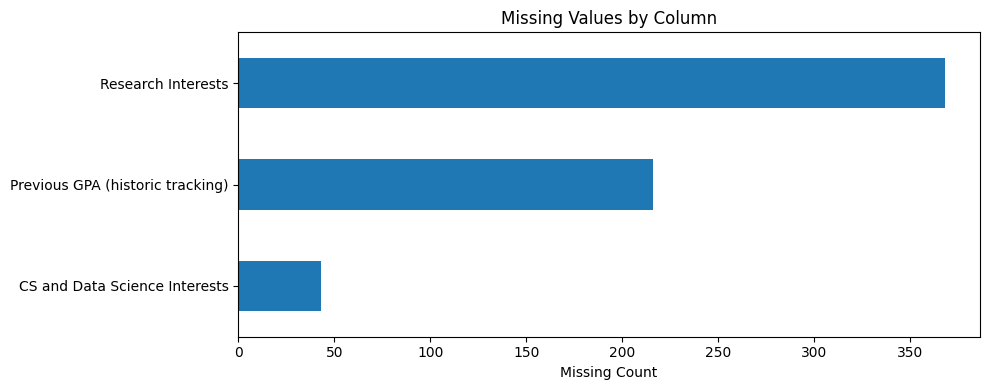

In [5]:
# Visualize missing values
missing_viz = df.isnull().sum()
missing_viz = missing_viz[missing_viz > 0].sort_values(ascending=True)
if len(missing_viz) > 0:
    plt.figure(figsize=(10, max(4, len(missing_viz) * 0.3)))
    missing_viz.plot(kind='barh')
    plt.xlabel('Missing Count')
    plt.title('Missing Values by Column')
    plt.tight_layout()
    plt.show()

In [ ]:
##Checking for missing values percentages
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values()
print(missing_percent)

CS and Data Science Interests        2.866667
Previous GPA (historic tracking)    14.400000
Research Interests                  24.533333
dtype: float64


In [8]:
# Fill text columns
df["CS and Data Science Interests"] = df["CS and Data Science Interests"].fillna("Not Specified")
df["Research Interests"] = df["Research Interests"].fillna("Not Specified")


In [9]:
import numpy as np

def clean_gpa(value):
    if pd.isna(value):
        return np.nan
    
    # Convert to string
    value = str(value)
    
    # Split if multiple GPAs
    if ";" in value:
        numbers = [float(x.strip()) for x in value.split(";") if x.strip() != ""]
        return np.mean(numbers)
    else:
        try:
            return float(value)
        except:
            return np.nan

# Apply cleaning
df["Previous GPA (historic tracking)"] = df["Previous GPA (historic tracking)"].apply(clean_gpa)

In [10]:
df["Previous GPA (historic tracking)"] = df["Previous GPA (historic tracking)"].fillna(
    df["Previous GPA (historic tracking)"].median()
)

In [11]:
# ---------------------------------------
# STEP 1: Combine Important Text Features
# ---------------------------------------

# We combine multiple skill-related columns into one single text column.
# This helps us treat each student as one "profile document"
# for similarity comparison using NLP techniques.

df["combined_features"] = (
    df["Technical Skills"].astype(str) + " " +
    df["Soft Skills"].astype(str) + " " +
    df["Research Interests"].astype(str) + " " +
    df["CS and Data Science Interests"].astype(str)
)

In [12]:
# ---------------------------------------
# STEP 2: Clean the Text Data
# ---------------------------------------

# Convert all text to lowercase to ensure uniformity.
# This prevents treating "Python" and "python" as different words.

df["combined_features"] = (
    df["combined_features"]
    .str.lower()
    .str.strip()   # Removes extra spaces at beginning and end
)

In [13]:
# ---------------------------------------
# STEP 3: Transform Text into TF-IDF Vectors
# ---------------------------------------

# TF-IDF (Term Frequency - Inverse Document Frequency)
# converts text into numerical vectors.
# Each student profile becomes a vector of weighted words.

from sklearn.feature_extraction.text import TfidfVectorizer

# Remove common English stop words (e.g., "and", "the", etc.)
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the combined student profiles
tfidf_matrix = vectorizer.fit_transform(df["combined_features"])

In [14]:
# ---------------------------------------
# STEP 4: Compute Cosine Similarity Matrix
# ---------------------------------------

# Cosine similarity measures how similar two students are
# based on their skill and interest vectors.
# Values range from:
# 0 = completely different
# 1 = identical profiles

from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tfidf_matrix)

In [15]:
# ---------------------------------------
# STEP 5: Build Peer Recommendation Function
# ---------------------------------------

# This function finds the top N most similar students
# to a given student index.

def recommend_peers(student_index, top_n=5):
    
    # Get similarity scores for the selected student
    similarity_scores = list(enumerate(similarity_matrix[student_index]))
    
    # Sort students by similarity score (highest first)
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    # Skip the first result (student matched with themselves)
    top_matches = similarity_scores[1:top_n+1]
    
    return top_matches

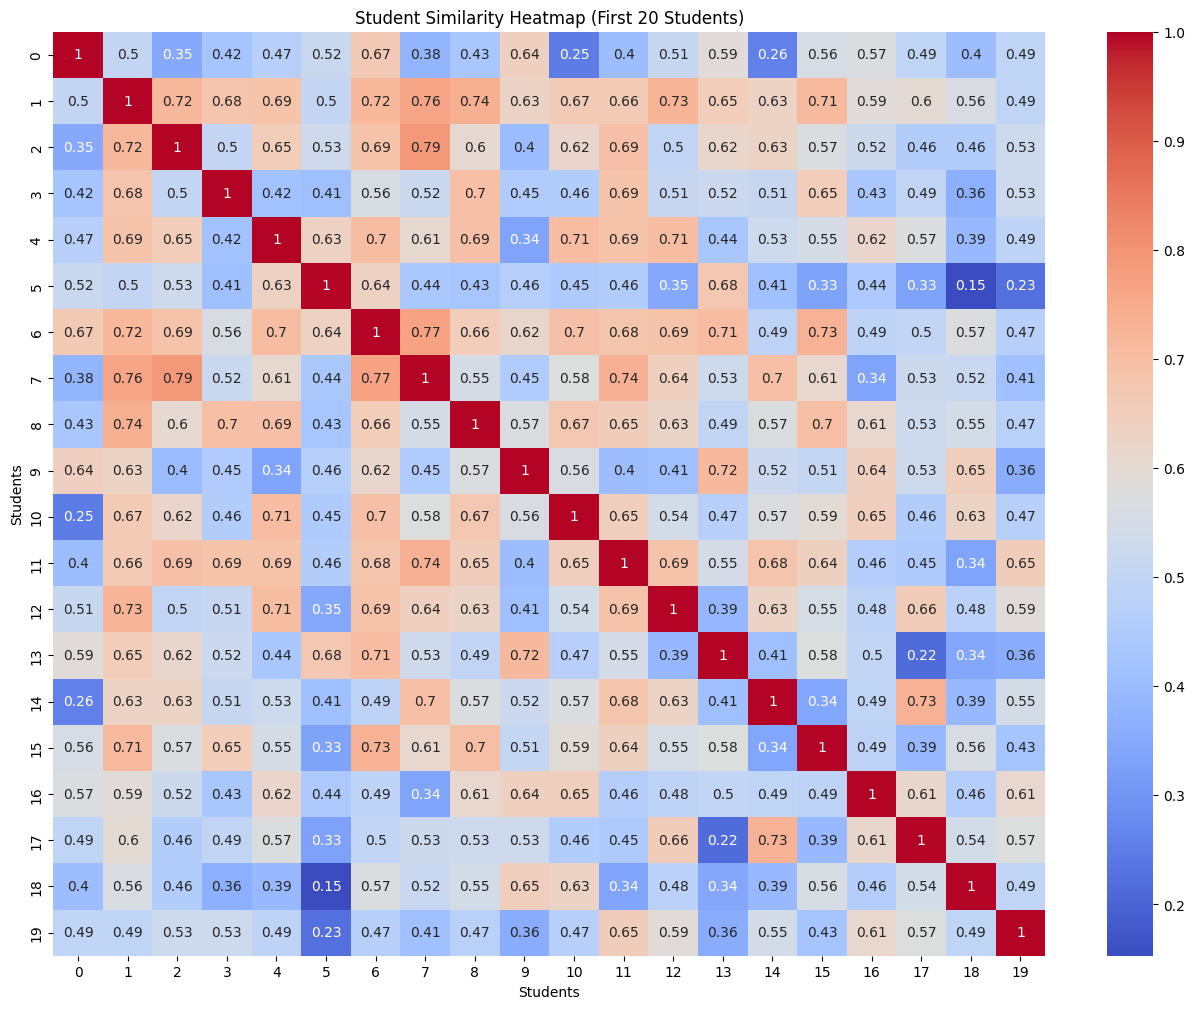

In [29]:
# =========================================================
# VISUALIZATION 3: Student Similarity Heatmap
# =========================================================

import seaborn as sns

# Create figure
plt.figure(figsize=(16, 12))

# Plot heatmap for first 20 students (for clarity)
# similarity_matrix contains cosine similarity scores
sns.heatmap(similarity_matrix[:20, :20], annot = True ,cmap="coolwarm")

# Add title and axis labels
plt.title("Student Similarity Heatmap (First 20 Students)")
plt.xlabel("Students")
plt.ylabel("Students")

# Display heatmap
plt.show()

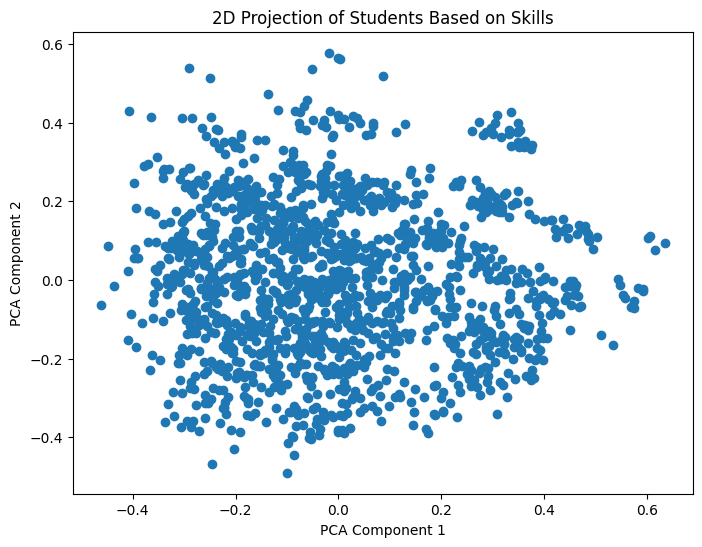

In [17]:
# =========================================================
# VISUALIZATION 4: 2D Projection of Students (PCA)
# =========================================================

from sklearn.decomposition import PCA

# Reduce high-dimensional TF-IDF vectors into 2 dimensions
# This allows visual representation of student similarity
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_matrix.toarray())

# Create scatter plot
plt.figure(figsize=(8, 6))

plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1])

# Add labels and title
plt.title("2D Projection of Students Based on Skills")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# Display plot
plt.show()

In [20]:
# =========================================================
# CLUSTERING: Apply KMeans to Student Profiles
# =========================================================

from sklearn.cluster import KMeans

# Choose number of clusters
# 4–6 is usually reasonable for student grouping
num_clusters = 4

# Initialize KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the model using TF-IDF matrix
kmeans.fit(tfidf_matrix)

# Assign cluster labels to each student
df["cluster"] = kmeans.labels_

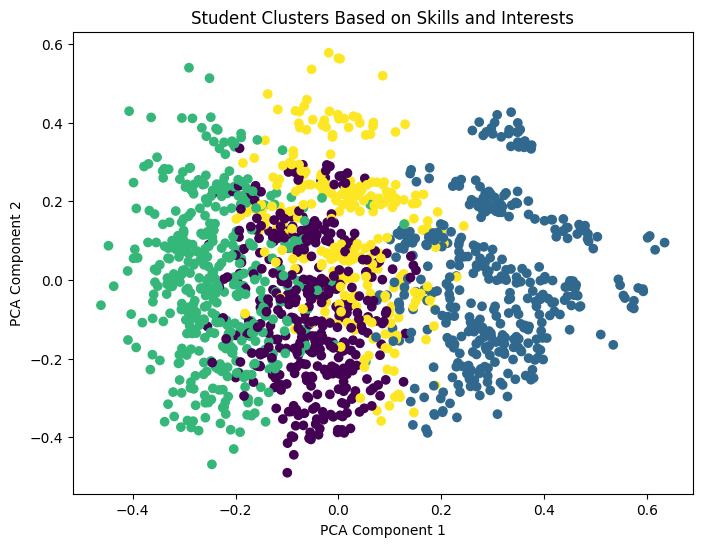

In [21]:
# =========================================================
# VISUALIZATION: Cluster Distribution (PCA Projection)
# =========================================================

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce high-dimensional TF-IDF vectors to 2 dimensions
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_matrix.toarray())

# Create scatter plot colored by cluster
plt.figure(figsize=(8,6))

plt.scatter(
    reduced_vectors[:, 0],
    reduced_vectors[:, 1],
    c=df["cluster"]   # Color by cluster label
)

plt.title("Student Clusters Based on Skills and Interests")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

plt.show()

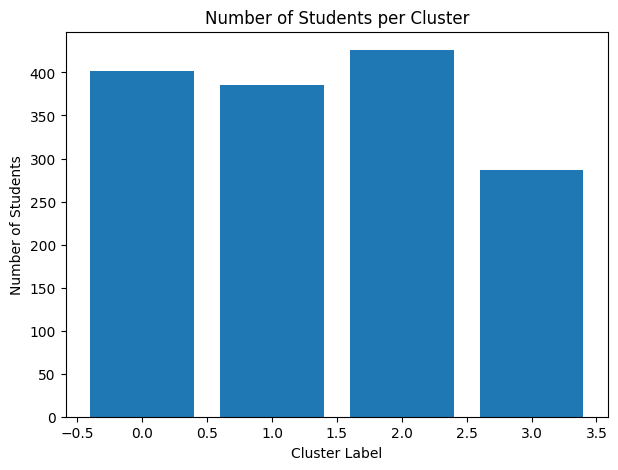

In [22]:
# =========================================================
# VISUALIZATION: Number of Students per Cluster
# =========================================================

cluster_counts = df["cluster"].value_counts().sort_index()

plt.figure(figsize=(7,5))

plt.bar(cluster_counts.index, cluster_counts.values)

plt.title("Number of Students per Cluster")
plt.xlabel("Cluster Label")
plt.ylabel("Number of Students")

plt.show()